# Descriptive Statistics with Python
*by KariAnn Harjo*

In the always-evolving landscape of video gaming, understanding what makes a game truly stand out is crucial for developers, marketers, and enthusiasts alike. This project aims to delve into the realm of critically acclaimed video games, leveraging the "Best Video Games of All Time - Metacritic" dataset created by Dariano Gina. The dataset compiles an extensive list of video games that have left an indelible mark on the industry, as reflected through their Metacritic scores. By analyzing this rich compilation, we seek to uncover patterns and insights that contribute to a game's success and recognition. Through a combination of data analysis and statistical methods using Python, this study will explore various facets of the data, including outlier identification, bias detection, and the impact of missing data. Moreover, we will examine measures of central tendency and variability to gain a deeper understanding of the dataset's distribution. By employing Python for data cleaning, visualization, and group analysis, this project not only aims to highlight the characteristics of top-rated video games but also to enhance our analytical skills in handling real-world datasets. 

## Task 1: Outlier Identification and Handling

The Python script below demonstrates how to identify and handle outliers using Z-score and IQR methods. The visualizations before and after outlier removal clearly show the impact of outliers on the dataset, particularly on measures of central tendency and variability. Removing outliers can help in obtaining a more accurate analysis, as outliers can significantly skew the results.

Outliers or *extreme* values in datasets can significantly impact statistical analyses, particularly measures of central tendency (our best friends--mean, median, mode) and variability (range, variance, standard deviation). Understanding and managing outliers is crucial for accurate data analysis.

Mean: Outliers can skew the mean, making it not representative of the data.
Median: Less affected by outliers, making it a more robust measure of central tendency in skewed distributions.
Mode: Unaffected by outliers, as it simply represents the most frequent value.
Variance and Standard Deviation: Sensitive to outliers, as they square the differences from the mean, exaggerating the impact of extreme values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
data = pd.read_csv('metacritic_games.csv')
# print(data.head())

# Identify outliers using Interquartile Range (IQR) method.
Q1 = data['metascore'].quantile(0.25)
Q3 = data['metascore'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['metascore'] < (Q1 - 1.5 * IQR)) | (data['metascore'] > (Q3 + 1.5 * IQR))]
print("Outliers using IQR method:")
print(outliers_iqr)

# Identify outliers using Z-score method.
z_scores = stats.zscore(data['metascore'])
data['z_score'] = z_scores  # Adding Z-scores as a new column in the DataFrame
outliers_z = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
print("\nOutliers using Z-score method:")
print(outliers_z)

Outliers using IQR method:
                                                     link  \
355     https://www.metacritic.com/game/flatout-3-chao...   
479     https://www.metacritic.com/game/winter-sports-...   
913     https://www.metacritic.com/game/self-defense-t...   
1148    https://www.metacritic.com/game/halloween-tric...   
1172                https://www.metacritic.com/game/ncis/   
...                                                   ...   
174964  https://www.metacritic.com/game/george-of-the-...   
175096  https://www.metacritic.com/game/best-of-tests-ds/   
175109     https://www.metacritic.com/game/homie-rollerz/   
175342  https://www.metacritic.com/game/jumper-griffin...   
175343  https://www.metacritic.com/game/jumper-griffin...   

                                                     name  \
355                        FlatOut 3: Chaos & Destruction   
479                   Winter Sports 2012: Feel the Spirit   
913                            Self-Defense Training Camp

c:\Users\khbil\.conda\envs\Py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


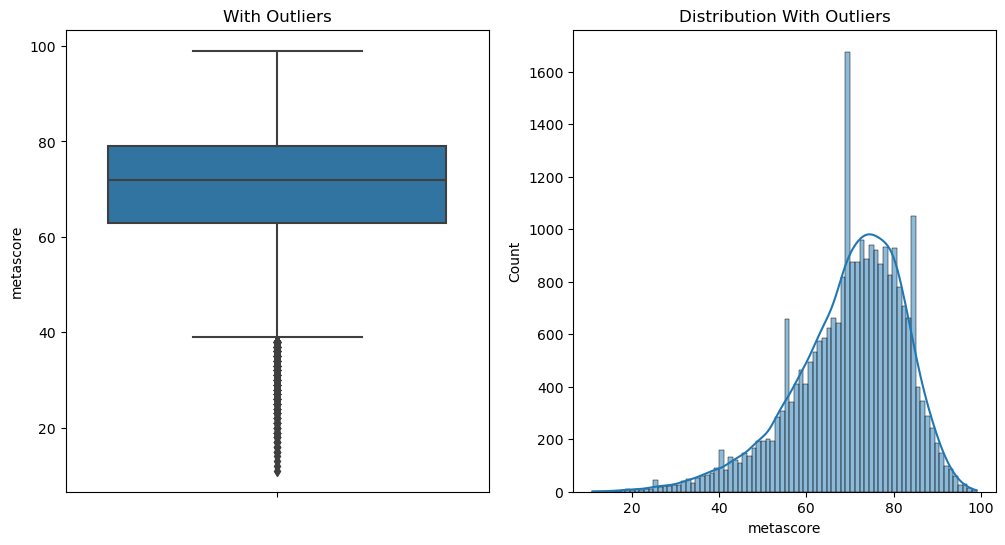

In [2]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['metascore'])
plt.title('With Outliers')

plt.subplot(1, 2, 2)
sns.histplot(data['metascore'], kde=True)
plt.title('Distribution With Outliers')
plt.show()

c:\Users\khbil\.conda\envs\Py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


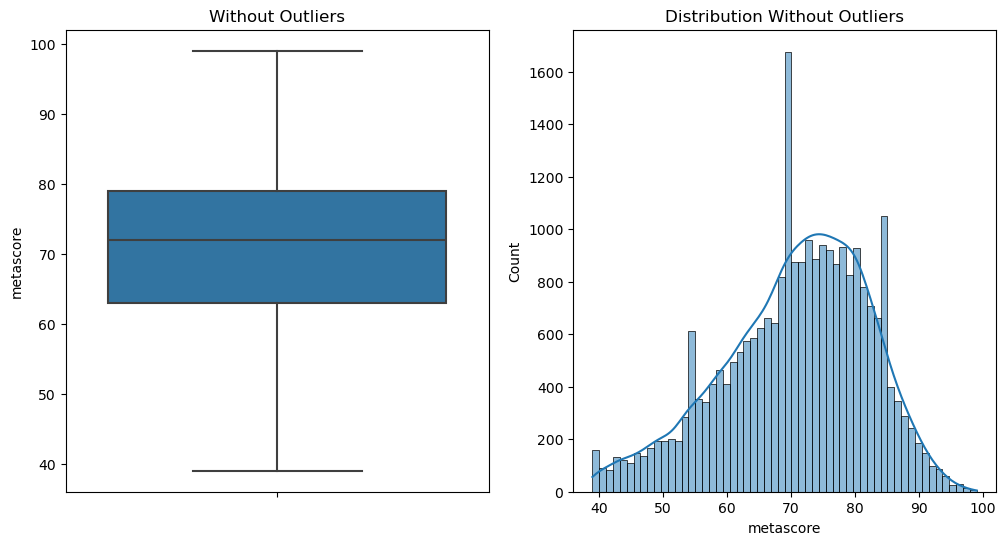

In [3]:
data_cleaned = data[~((data['metascore'] < (Q1 - 1.5 * IQR)) | (data['metascore'] > (Q3 + 1.5 * IQR)))]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data_cleaned['metascore'])
plt.title('Without Outliers')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['metascore'], kde=True)
plt.title('Distribution Without Outliers')
plt.show()

## Task 2: Bias and Confounding Variables Identification

### Analyzing the Dataset's Features and Collection Methodology
Selection Bias: This type of bias could occur if the dataset predominantly includes games from certain platforms, genres, or time periods, potentially skewing the analysis towards those categories. For instance, if newer games or specific genres like action and adventure are overrepresented, it might lead to conclusions that don't accurately reflect the entire spectrum of video games.

Publication Bias: Games that are reviewed and rated on Metacritic might not represent all video games equally. Typically, games that are expected to perform well or come from well-known developers and publishers are more likely to get reviewed. This could lead to an overestimation of the overall quality of games.

Survivorship Bias: The dataset might predominantly feature games that have been successful enough to garner attention and get rated on Metacritic, ignoring less successful or indie games that might offer a different perspective on game quality and player satisfaction.

### Identifying Confounding Variables
Game Platform: The platform (PC, PlayStation, Xbox, etc.) for which a game is developed can be a confounding variable. Some platforms may have higher average scores due to the demographic of their user base or the types of games that are more common on that platform.

Release Year: The year a game was released can also be a confounding variable. Older games might have lower scores due to evolving standards in graphics and gameplay, or they might have higher scores due to nostalgia and their impact on the gaming industry.

Developer/Publisher Reputation: The reputation of a game's developer or publisher might influence its Metascore, independent of the game's actual quality. Games from well-established developers might receive higher scores due to expectations and brand loyalty.

### Impact on Analysis
Misinterpretation of Quality Factors: Without accounting for these biases and confounding variables, one might incorrectly attribute a game's success to its intrinsic qualities, overlooking external factors like marketing, platform availability, or historical context.

Inaccurate Predictions: Biases and confounding variables can lead to inaccurate predictions about future game success, potentially misleading developers and investors.


In [4]:
#View of all of the platforms that may contain platform bias
platform_groups = data.groupby('platform')

for name, group in platform_groups:
    print(f"Analyzing platform: {name}")

Analyzing platform: 3DS
Analyzing platform: DS
Analyzing platform: Dreamcast
Analyzing platform: Game Boy Advance
Analyzing platform: GameCube
Analyzing platform: Meta Quest
Analyzing platform: Nintendo 64
Analyzing platform: Nintendo Switch
Analyzing platform: PC
Analyzing platform: PSP
Analyzing platform: PlayStation
Analyzing platform: PlayStation 2
Analyzing platform: PlayStation 3
Analyzing platform: PlayStation 4
Analyzing platform: PlayStation 5
Analyzing platform: PlayStation Vita
Analyzing platform: Wii
Analyzing platform: Wii U
Analyzing platform: Xbox
Analyzing platform: Xbox 360
Analyzing platform: Xbox One
Analyzing platform: Xbox Series X
Analyzing platform: iOS (iPhone/iPad)


## Task 3: Handling Missing Data

There are two primary methods to handle missing data, removal and imputation (filling in missing values):

Removal: This method involves deleting rows or columns with missing values. It's straightforward but can lead to significant data loss, especially if the dataset is not large or if the missingness is not completely random.

Imputation: This method involves filling in missing values based on other observations. Imputation can preserve data points and maintain the dataset size, but it introduces assumptions about the substituting values (Simplilearn, 2023)

 For this example, let's assume that the missing data is less than 5% of the dataset and appears to be missing at random. In this case, imputation would be a suitable method as it allows us to retain as much information as possible without significantly biasing our analysis.

Justify a method for handling missing data (e.g., imputation, removal).

Implement the chosen method using pandas or sklearn.impute.SimpleImputer.

In [5]:
# Calculate the total number of missing values for each column
missing_per_column = data.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(data)

# Calculate the percentage of missing data for each column
percentage_missing_per_column = (missing_per_column / total_rows) * 100

print("Percentage of missing data per column:\n", percentage_missing_per_column)



Percentage of missing data per column:
 link                               0.000000
name                               0.142350
developer                          1.583506
publisher                          0.218650
summary                           24.057213
genres                             0.000000
rating                            67.126174
platform                           0.000000
release_date                       5.396787
metascore                         85.114137
critic_reviews_count              74.482272
positive_critic_reviews_count     82.875250
mixed_critic_reviews_count        79.819272
negative_critic_reviews_count     91.875779
user_score                        82.748273
user_reviews_count                80.230380
positive_user_reviews_count       81.693172
mixed_user_reviews_count          83.843232
negative_user_reviews_count       83.445221
z_score                          100.000000
dtype: float64


## Task 4: Analysis of Mean and Median Values

If the mean is greater than the median, the distribution is right-skewed (positively skewed), indicating that higher values are stretching the tail to the right.

If the mean is less than the median, the distribution is left-skewed (negatively skewed), suggesting that lower values are pulling the tail to the left.

If the mean and median are approximately equal, the distribution is likely symmetric.

A significant difference between the mean and median indicates the presence of outliers or a long tail in one direction of the data distribution. This can impact the choice of statistical methods and interpretations of the data.
In the presence of skewness, the median is often considered a more robust measure of central tendency than the mean, as it is less influenced by extreme values.

Understanding the relationship between the mean and median in your dataset is crucial for accurately interpreting your data, especially when deciding on the appropriate statistical tests or models to apply. The visualization step not only aids in this interpretation but also provides a clear, intuitive understanding of the data's distribution to stakeholders.

Mean Metascore: 69.79914317408101
Median Metascore: 72.0


c:\Users\khbil\.conda\envs\Py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


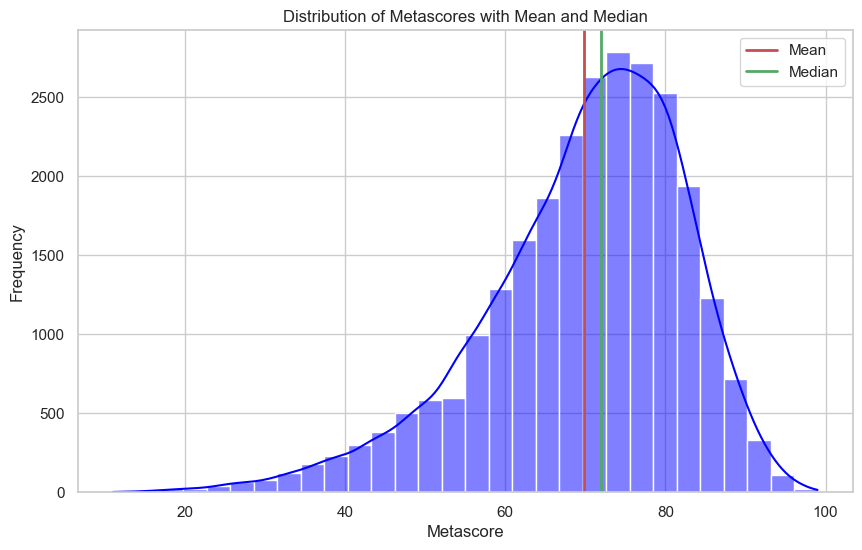

In [6]:
# Calculate mean and median
mean_value = data['metascore'].mean()
median_value = data['metascore'].median()

print(f"Mean Metascore: {mean_value}")
print(f"Median Metascore: {median_value}")

sns.set(style="whitegrid")

# Plot the distribution of metascores
plt.figure(figsize=(10, 6))
sns.histplot(data['metascore'], kde=True, color="blue", bins=30)

# Highlight the mean and median
plt.axvline(mean_value, color='r', linestyle='-', linewidth=2, label='Mean')
plt.axvline(median_value, color='g', linestyle='-', linewidth=2, label='Median')

plt.title('Distribution of Metascores with Mean and Median')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Task 5: Measures of Central Tendency and Variability

The median is often more representative than the mean in skewed distributions or when outliers are present. The mode is less commonly used as a measure of central tendency in numerical data but can be valuable for categorical data or identifying the most common value.

The standard deviation and variance are useful for understanding the spread of the data, but their sensitivity to outliers can be a limitation. The range is simple but can be misleading if outliers are present.

In summary, the choice of which measures to use depends on the data's characteristics and the specific analysis goals. Understanding the distribution and presence of outliers is crucial in selecting the most appropriate measures to accurately capture the data's characteristics.

In [7]:
# Calculate measures of central tendency
mean_value = data['metascore'].mean()
median_value = data['metascore'].median()
mode_value = data['metascore'].mode()[0] 

# Calculate measures of variability
range_value = data['metascore'].max() - data['metascore'].min()
variance_value = data['metascore'].var()
std_dev_value = data['metascore'].std()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_dev_value}")


Mean: 69.79914317408101
Median: 72.0
Mode: 73.0
Range: 88.0
Variance: 161.44856173233325
Standard Deviation: 12.70624105439265


## Task 6: Data Visualization

Visualizing data distributions through histograms and boxplots is a critical step in exploratory data analysis. These visualizations can reveal underlying patterns, outliers, and the shape of the distribution, guiding further analysis and decision-making. 

c:\Users\khbil\.conda\envs\Py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


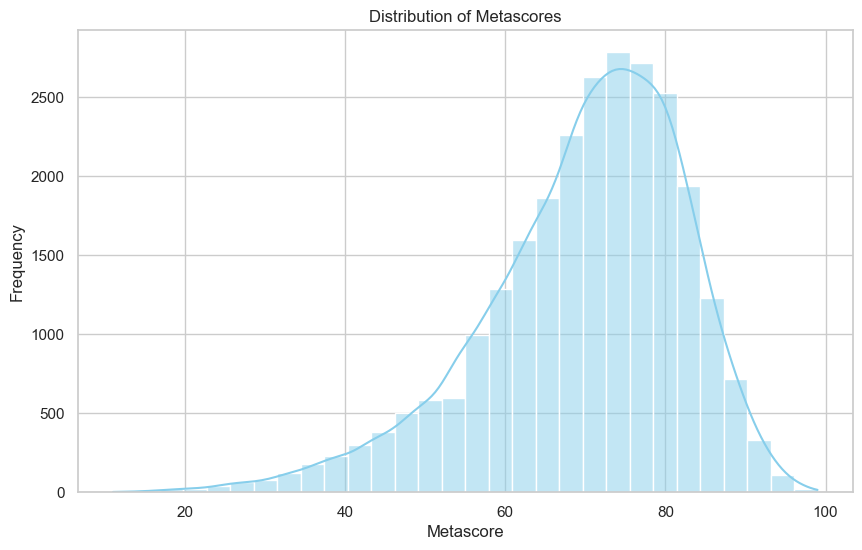

In [8]:
# Create a histogram for the 'metascore' column
plt.figure(figsize=(10, 6))
sns.histplot(data['metascore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Metascores')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

The median metascore (indicated by the line in the boxplot) provides a robust measure of central tendency. The IQR shows the middle 50% of the data, offering insights into the data's spread.

Any points outside the whiskers in the boxplot are considered outliers. These could represent exceptionally high or low-rated games and might warrant further investigation.

The histogram may reveal the distribution's shape (normal, skewed, bimodal), which can inform further statistical analysis or data preprocessing steps.

## Task 7: Measures of Central Tendency and Variability Calculation

Mean vs. Median: The comparison between the mean and median can indicate the skewness of the distribution. If the mean is significantly higher than the median, the distribution is likely right-skewed, suggesting a tail with higher values. Conversely, if the mean is lower, the distribution is left-skewed.

Mode: The mode represents the most frequent score in the dataset. In a unimodal distribution, the mode can give insight into the peak of the distribution. In bimodal or multimodal distributions, multiple modes can indicate the presence of distinct subgroups within the data.

Range: While the range provides a quick sense of the spread, it's highly sensitive to outliers. A large range might indicate the presence of extreme values.

Variance and Standard Deviation: These measures give a more nuanced view of the spread of the data around the mean. A high variance or standard deviation indicates that the scores are spread out over a wider range of values. Comparing the standard deviation to the mean can help assess the relative variability of the data.

Understanding the measures of central tendency and variability in relation to the data distribution is crucial for accurate data analysis. These measures provide insights into the data's central point, spread, and overall shape, which are essential for making informed decisions based on the data.

In [9]:
# Calculate measures of central tendency
mean_value = data['metascore'].mean()
median_value = data['metascore'].median()
mode_value = data['metascore'].mode()[0]  
# Calculate measures of variability
range_value = data['metascore'].max() - data['metascore'].min()
variance_value = data['metascore'].var()
std_dev_value = data['metascore'].std()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_dev_value}")

Mean: 69.79914317408101
Median: 72.0
Mode: 73.0
Range: 88.0
Variance: 161.44856173233325
Standard Deviation: 12.70624105439265


## Task 8: Data Cleaning

 Data cleaning includes handling missing values (as seen in task 3), removing duplicates, and converting data types. After cleaning, we'll visualize the dataset to demonstrate the impact of these processes.

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 link                                  0
name                                250
developer                          2781
publisher                           384
summary                           42250
genres                                0
rating                           117889
platform                              0
release_date                       9478
metascore                        149480
critic_reviews_count             130808
positive_critic_reviews_count    145548
mixed_critic_reviews_count       140181
negative_critic_reviews_count    161355
user_score                       145325
user_reviews_count               140903
positive_user_reviews_count      143472
mixed_user_reviews_count         147248
negative_user_reviews_count      146549
z_score                          175623
dtype: int64


In [11]:
# Identify duplicate rows
print(f"Duplicate rows: {data.duplicated().sum()}")

# Remove duplicates
data.drop_duplicates(inplace=True)

Duplicate rows: 0


In [12]:
# Convert data types if necessary
data['metascore'] = data['metascore'].astype('category')

c:\Users\khbil\.conda\envs\Py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khbil\.conda\envs\Py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


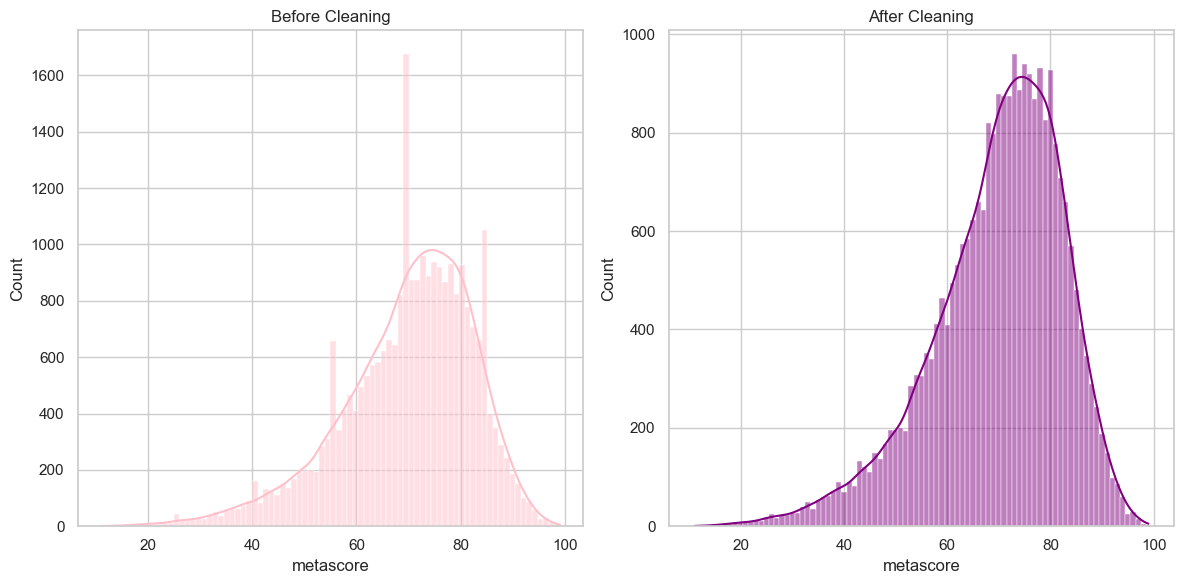

In [13]:
data_before_cleaning = pd.read_csv('metacritic_games.csv')



# Assuming 'numerical_column' is a column you've cleaned
plt.figure(figsize=(12, 6))

# Before cleaning
plt.subplot(1, 2, 1)
sns.histplot(data_before_cleaning['metascore'], color='pink', kde=True)
plt.title('Before Cleaning')

# After cleaning
plt.subplot(1, 2, 2)
sns.histplot(data['metascore'], color='purple', kde=True)
plt.title('After Cleaning')

plt.tight_layout()
plt.show()

## Task 9: Group Analysis

Python Libraries: pandas, matplotlib, seaborn

Approach: Group data using pandas.groupby.

Calculate measures of central tendency and variability for each group.

Visualize results using appropriate plots and interpret differences between groups.

In [14]:
# Convert 'metascore' and 'user_score' to float
data['metascore'] = pd.to_numeric(data['metascore'], errors='coerce')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Now proceed with the group analysis
grouped_data = data.groupby('genres')
group_stats = grouped_data.agg({
    'metascore': ['mean', 'median', 'std'],
    'user_score': ['mean', 'median', 'std']
}).reset_index()

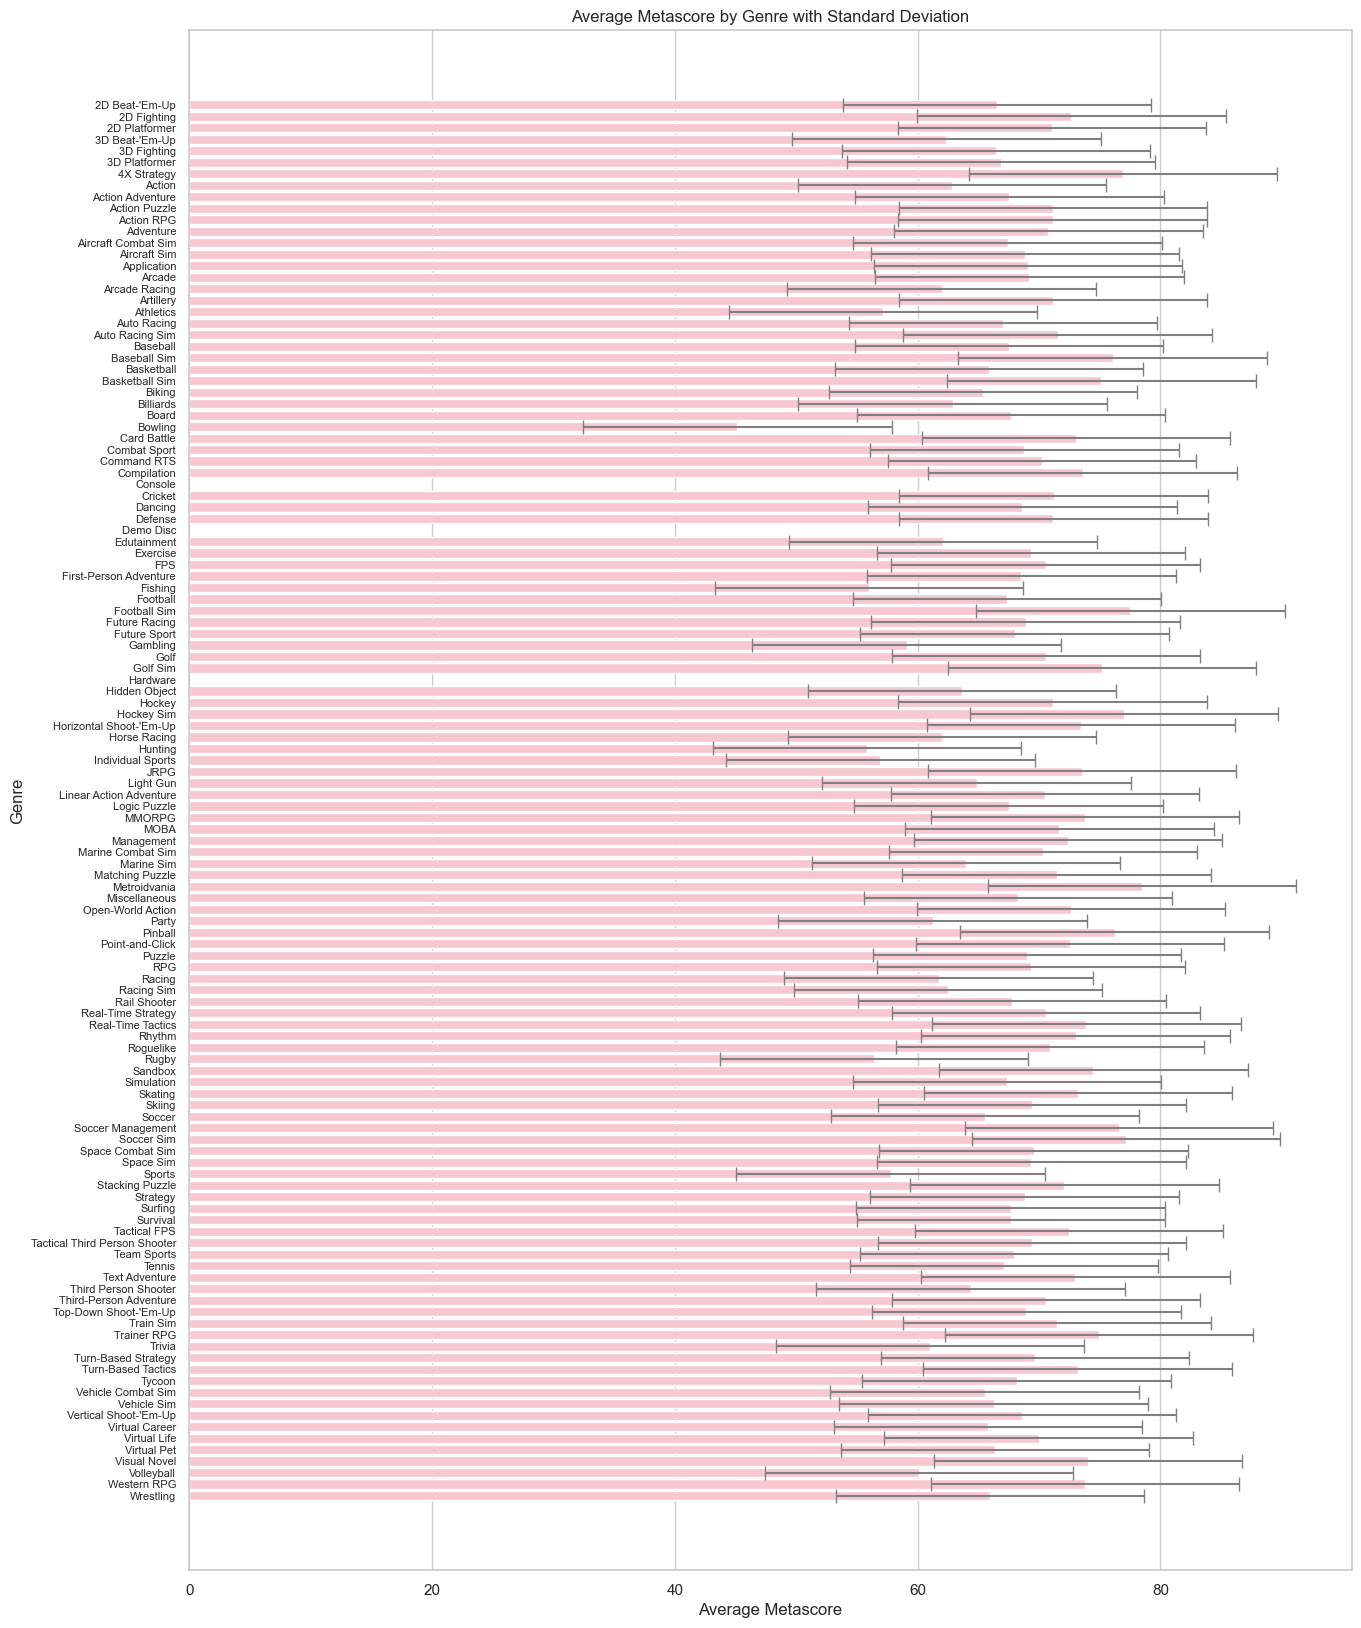

In [15]:
plt.figure(figsize=(15, 20))  
sns.barplot(y='genres', x=('metascore', 'mean'), data=group_stats, capsize=.2, color='pink', orient='h')
plt.errorbar(y=np.arange(len(group_stats['genres'])), x=group_stats[('metascore', 'mean')], xerr=std_dev_value, fmt='none', c='gray', capsize=5)
plt.title('Average Metascore by Genre with Standard Deviation')
plt.ylabel('Genre')  
plt.xlabel('Average Metascore')

# Adjust the font size of y-axis labels
plt.yticks(fontsize=8)  #
plt.show()

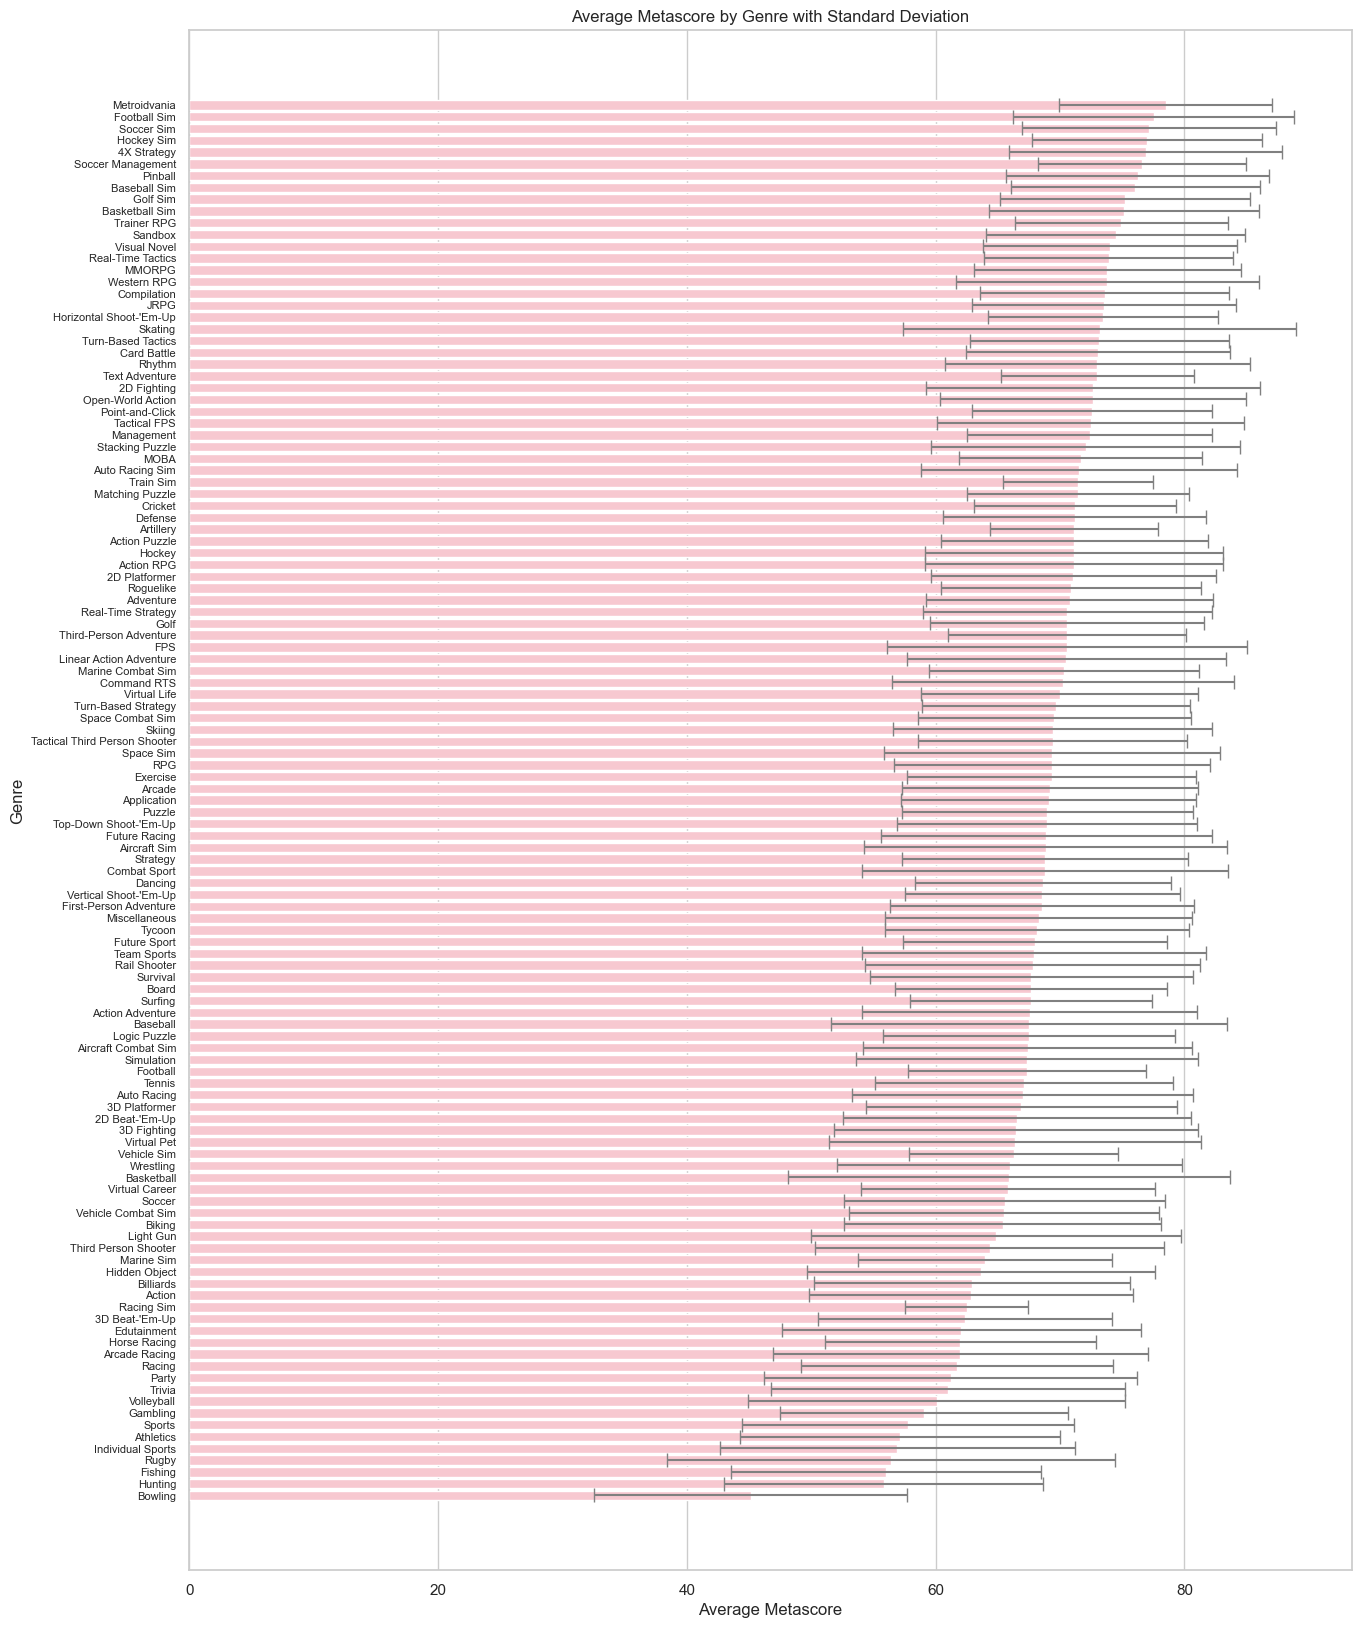

In [16]:
#remove rows with missing values in 'genre' column as noticed in the previous step
'''
data['genres'] = data['genres'].str.strip()
data = data[(data['genres'] != "") & (data['genres'].notna())]
data = data.dropna(subset=['genres'])
data = data[data['genres'] != ""]
'''


# Sort the DataFrame by 'metascore' mean in descending order
group_stats = data.groupby('genres', as_index=False).agg({'metascore': ['mean', 'std']})
group_stats.columns = ['genres', 'mean_metascore', 'std_metascore']  # Simplify column names

# Sort by 'mean_metascore' in descending order
sorted_group_stats = group_stats.sort_values(by='mean_metascore', ascending=False)

#previous code was not working so I removed empty genres manually
sorted_group_stats = sorted_group_stats[:-3] 

# Plotting
plt.figure(figsize=(15, 20))
sns.barplot(y='genres', x='mean_metascore', data=sorted_group_stats, color='pink', orient='h')
plt.title('Average Metascore by Genre with Standard Deviation')
plt.xlabel('Average Metascore')
plt.ylabel('Genre')

# Calculate positions for the error bars
y_positions = np.arange(len(sorted_group_stats['genres']))

# Add error bars
plt.errorbar(x=sorted_group_stats['mean_metascore'], y=y_positions, xerr=sorted_group_stats['std_metascore'], fmt='none', c='gray', capsize=5, linestyle="None")

# Adjust the font size of y-axis labels
plt.yticks(fontsize=8)


plt.show()

*Note: I didn't know what "Metroidvania" was, so here ya go: "The Metroidvania style of gameplay focuses on free exploration of one large 2D open world. It is so named as a portmanteau of 'Metroid' and 'Castlevania' as the style was largely popularized by the Metroid and Castlevania franchises" (CritalKate 2023).



### Sources

CritcalKate. Giant Bomb. (2023). Metroidvania. Retrieved February 7, 2024, from https://www.giantbomb.com/metroidvania/3015-2440/

Gina, D. (n.d.). Best video games of all time - Metacritic. Kaggle. Retrieved from https://www.kaggle.com/datasets/darianogina/best-video-games-of-all-time-metacritic/data

Kaur, J. (2019). Detecting outliers: Use absolute deviation around the median but do not use standard deviation around the mean. Journal of Emerging Technologies and Innovative Research (JETIR), 6(3). Retrieved from www.jetir.org (ISSN-2349-5162)

Rogel-Salazar, J. (2023). The Measure of All Things – Statistics. In Statistics and data visualisation with Python (1st ed.). CRC Press.

Simplilearn. (2023). What Is Data Imputation? Simplilearn. https://www.simplilearn.com/data-imputation-article#:~:text=ProgramExplore%20Program-,What%20Is%20Data%20Imputation%3F,from%20a%20da

Zequera RAG, Rassolkin A, Vaimann T, Kallaste A. Clustering and Outlier Analysis for Key Performance Indicators in Battery Energy Storage Systems applications. 2023 IEEE 17th International Conference on Compatibility, Power Electronics and Power Engineering (CPE-POWERENG), Compatibility, Power Electronics and Power Engineering (CPE-POWERENG), 2023 IEEE 17th International Conference on. June 2023:1-6. doi:10.1109/CPE-POWERENG58103.2023.10227417